# PRACTICE PROJECT - TITANIC DATA SET -USE POWER TRANSFORM AND ZSCORE AGAIN 

In [2]:
import pandas as pd
import numpy as np

In [3]:
dd=pd.read_csv('titanicdatasetfinal.csv')

In [4]:
df=pd.DataFrame(data=dd)

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## DULPICATE VALUES CHECK 

In [6]:
newdf=df.drop_duplicates()

In [7]:
newdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### NO DUPLICATE VALUES

## CHECKING THE COUNT OF VARIOUS COLUMNS


In [8]:
newdf['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
newdf['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
newdf['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
newdf['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
newdf['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
newdf['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## CHECKING THE UNIQUE VALUES IN  ALL COLUMNS

In [14]:
newdf['Survived'].unique()

array([0, 1], dtype=int64)

In [15]:
newdf['Sex'].unique()

array(['male', 'female'], dtype=object)

In [16]:
newdf['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
newdf['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [18]:
newdf['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [19]:
newdf['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [20]:
newdf['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [21]:
newdf['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

## IDENTIFICATION OF VARIABLES & DATA TYPES

In [22]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


## WE HAVE INTEGARS, FLOAT AND CATAGORICAL DATA PRESENT, WE WILL CONVERT THE CATAGORICAL COLUMNS TO NUMERICAL ONES BY USING LABEL ENCODER

In [23]:
newdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## OUT OF 891 ROWS, 687 ARE BLANK IN CASE OF CABIN, SINCE THE NUMBER OF MISSING DATA IS EXTREMELY HIGH, WE ARE DROPPING THE CABIN COLUMN

In [24]:
newdf1=newdf.drop(['Cabin'],axis=1)

In [25]:
newdf1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## SIMPLE IMPUTER- AGE & EMBARKED COLUMN TO FILL IN MISSING VALUES

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
imp=SimpleImputer(missing_values=np.NaN,strategy='mean')

In [28]:
newdf1['Age']=imp.fit_transform(newdf['Age'].values.reshape(-1,1))

In [29]:
newdf1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [30]:
newdf1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [31]:
imp1=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')

In [32]:
newdf1['Embarked']=imp1.fit_transform(newdf1['Embarked'].values.reshape(-1,1))

In [33]:
newdf1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## NO NULL VALUES ARE PRESENT ANYMORE

## FIRST 5 COLUMN CHECK

In [34]:
newdf1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## LAST 5 COLUMN CHECK

In [35]:
newdf1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q


## SAMPLE COLUMN CHECK

In [36]:
newdf1.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,Q


## CHECKING THE VAIROUS COLUMNS PRESENT IN THE DATA SET

In [37]:
newdf1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## SHIFTING THE TARGET COLUMN TO THE END

In [38]:
newdf1=newdf1[['PassengerId','Pclass','Name','Age','Sex','SibSp','Parch','Ticket','Fare','Embarked','Survived']]

## NON GRAPHICAL UNIVARIATE ANALYSIS

In [39]:
newdf1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


## GRAPHICAL UNIVARIATE ANALYSIS

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

## BIVARIATE ANALYSIS

## MULTIVARIATE ANALYSIS

## ENCODING THE CATAGORICAL DATA

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()

In [43]:
newdf1['Sex']=le.fit_transform(newdf1['Sex'])

In [44]:
newdf1['Embarked']=le.fit_transform(newdf1['Embarked'])

In [45]:
newdf1

,PassengerId,Pclass,Name,Age,Sex,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",22.000000,1,1,0,A/5 21171,7.2500,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,0,1,0,PC 17599,71.2833,0,1
2,3,3,"Heikkinen, Miss. Laina",26.000000,0,0,0,STON/O2. 3101282,7.9250,2,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,0,1,0,113803,53.1000,2,1
4,5,3,"Allen, Mr. William Henry",35.000000,1,0,0,373450,8.0500,2,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",27.000000,1,0,0,211536,13.0000,2,0
887,888,1,"Graham, Miss. Margaret Edith",19.000000,0,0,0,112053,30.0000,2,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,0,1,2,W./C. 6607,23.4500,2,0
889,890,1,"Behr, Mr. Karl Howell",26.000000,1,0,0,111369,30.0000,0,1


In [46]:
newdf1['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

## CORRELATION ANALYSIS 

In [47]:
newdf1.corr()

,PassengerId,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Survived
PassengerId,1.000000,-0.035144,0.033207,0.042939,-0.057527,-0.001652,0.012658,0.013128,-0.005007
Pclass,-0.035144,1.000000,-0.331339,0.131900,0.083081,0.018443,-0.549500,0.162098,-0.338481
Age,0.033207,-0.331339,1.000000,0.084153,-0.232625,-0.179191,0.091566,-0.026749,-0.069809
Sex,0.042939,0.131900,0.084153,1.000000,-0.114631,-0.245489,-0.182333,0.108262,-0.543351
SibSp,-0.057527,0.083081,-0.232625,-0.114631,1.000000,0.414838,0.159651,0.068230,-0.035322
Parch,-0.001652,0.018443,-0.179191,-0.245489,0.414838,1.000000,0.216225,0.039798,0.081629
Fare,0.012658,-0.549500,0.091566,-0.182333,0.159651,0.216225,1.000000,-0.224719,0.257307
Embarked,0.013128,0.162098,-0.026749,0.108262,0.068230,0.039798,-0.224719,1.000000,-0.167675
Survived,-0.005007,-0.338481,-0.069809,-0.543351,-0.035322,0.081629,0.257307,-0.167675,1.000000


<AxesSubplot:>

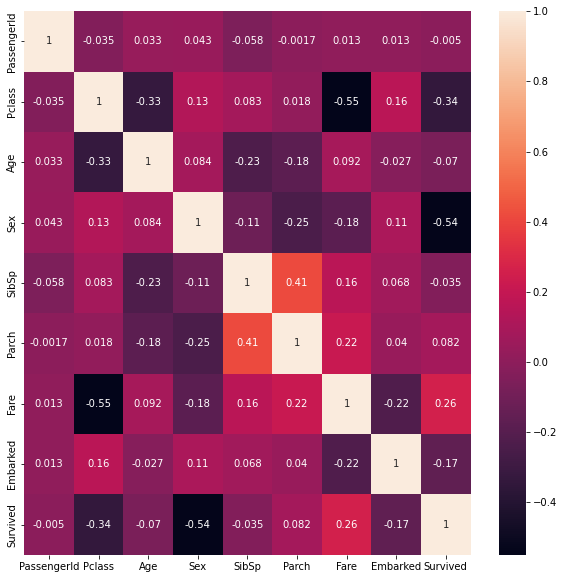

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(newdf1.corr(),annot=True)

In [49]:
newdf1.corr()['Survived'].sort_values

<bound method Series.sort_values of PassengerId   -0.005007
Pclass        -0.338481
Age           -0.069809
Sex           -0.543351
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked      -0.167675
Survived       1.000000
Name: Survived, dtype: float64>

## OUTLIERS CHECK- VISUAL 

In [50]:
newdf1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Age', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

## DROPPING THE FOLLOWING COLUMNS - PASSENGER-ID, NAME AND TICKET

In [51]:
DF=newdf1.drop(columns=['PassengerId','Ticket','Name'],axis=1)

In [52]:
DF

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Survived
0,3,22.000000,1,1,0,7.2500,2,0
1,1,38.000000,0,1,0,71.2833,0,1
2,3,26.000000,0,0,0,7.9250,2,1
3,1,35.000000,0,1,0,53.1000,2,1
4,3,35.000000,1,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,2,27.000000,1,0,0,13.0000,2,0
887,1,19.000000,0,0,0,30.0000,2,1
888,3,29.699118,0,1,2,23.4500,2,0
889,1,26.000000,1,0,0,30.0000,0,1


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass'>

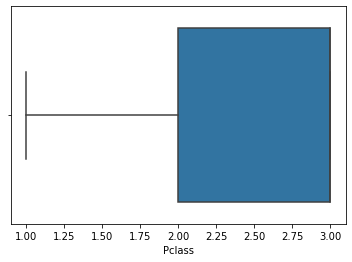

In [53]:
sns.boxplot(DF['Pclass'])

### NO OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex'>

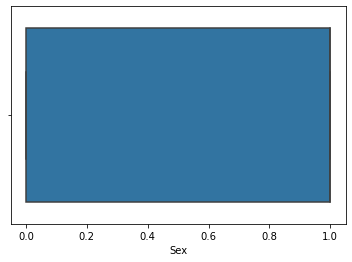

In [54]:
sns.boxplot(DF['Sex'])

### NO OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

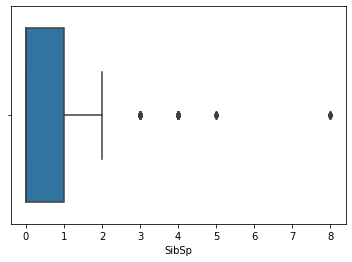

In [55]:
sns.boxplot(DF['SibSp'])

### OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch'>

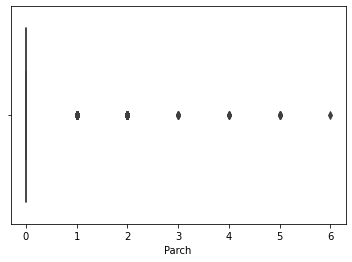

In [56]:
sns.boxplot(DF['Parch'])

### OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked'>

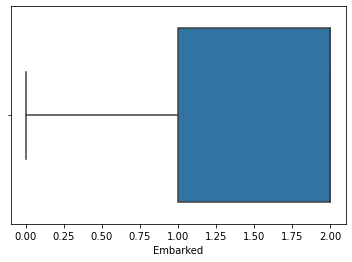

In [57]:
sns.boxplot(DF['Embarked'])

### NO OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

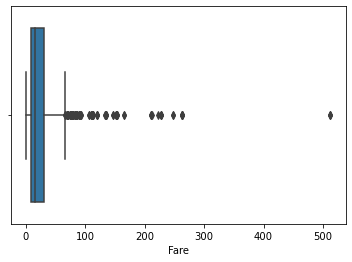

In [58]:
sns.boxplot(DF['Fare'])

### OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

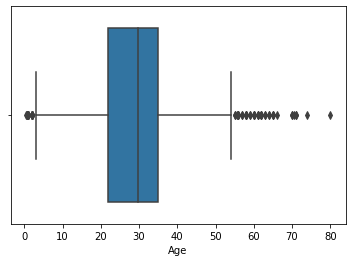

In [59]:
sns.boxplot(DF['Age'])

### OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived'>

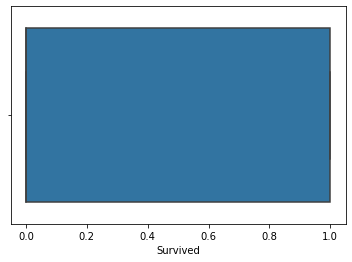

In [60]:
sns.boxplot(DF['Survived'])

### NO OUTLIERS ARE PRESENT 

## REMOVING OUTLIERS - ZSCORE 

In [61]:
from scipy.stats import zscore

In [215]:
z=np.abs(zscore(DF))

In [216]:
z

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Survived
0,0.827377,0.592481,0.737695,0.432793,0.473674,0.502445,0.585954,0.789272
1,1.566107,0.638789,1.355574,0.432793,0.473674,0.786845,1.942303,1.266990
2,0.827377,0.284663,1.355574,0.474545,0.473674,0.488854,0.585954,1.266990
3,1.566107,0.407926,1.355574,0.432793,0.473674,0.420730,0.585954,1.266990
4,0.827377,0.407926,0.737695,0.474545,0.473674,0.486337,0.585954,0.789272
...,...,...,...,...,...,...,...,...
886,0.369365,0.207709,0.737695,0.474545,0.473674,0.386671,0.585954,0.789272
887,1.566107,0.823344,1.355574,0.474545,0.473674,0.044381,0.585954,1.266990
888,0.827377,0.000000,1.355574,0.432793,2.008933,0.176263,0.585954,0.789272
889,1.566107,0.284663,0.737695,0.474545,0.473674,0.044381,1.942303,1.266990


In [217]:
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 1, 1, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 1, 5, 3, 3, 5, 4,
       4, 1, 4, 1, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 1, 4, 5, 3, 3, 3, 3,
       3, 3, 1, 4, 3, 4], dtype=int64))


In [218]:
NEWDF=DF[(z<3).all(axis=1)]

In [219]:
NEWDF

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Survived
0,3,22.000000,1,1,0,7.2500,2,0
1,1,38.000000,0,1,0,71.2833,0,1
2,3,26.000000,0,0,0,7.9250,2,1
3,1,35.000000,0,1,0,53.1000,2,1
4,3,35.000000,1,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,2,27.000000,1,0,0,13.0000,2,0
887,1,19.000000,0,0,0,30.0000,2,1
888,3,29.699118,0,1,2,23.4500,2,0
889,1,26.000000,1,0,0,30.0000,0,1


## DATA LOSS 

In [220]:
NEWDF.shape

(820, 8)

In [69]:
DF.shape

(891, 8)

In [70]:
(891-820)/891

0.07968574635241302

### THIS FALLS IN THE ACCEPTABLE RANGE OF 10%, HENCE WE WILL GO AHEAD WITH THE NEW DATA SET NEWDF

## SKEWNESS CHECK - VISUAL

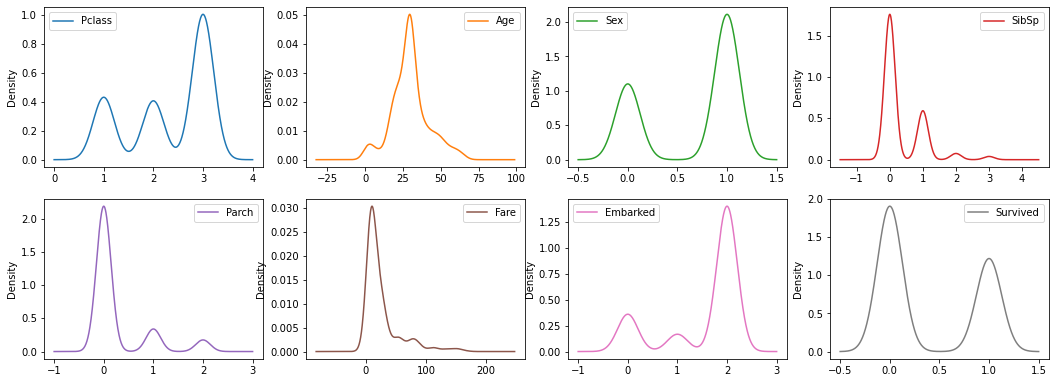

In [80]:
NEWDF.plot(kind='density',subplots=True,figsize=(18,10),sharex=False,layout=(3,4))
plt.show()

### SKEWNESS IS PRESENT IN MANY COLUMNS WHICH WE WILL ADDRESS

### OUR ACCEPTABLE RANGE OF SKEW IS +-0.50 

In [81]:
NEWDF.skew()

Pclass     -0.632242
Age         0.318314
Sex        -0.664152
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
Survived    0.450825
dtype: float64

### SKEWNESS TO BE CONSIDERED ONLY FOR CONTINUOUS COLUMNS, THAT IS FARE ,SINCE THEY IT POSITIVE, WE WILL USE SQRT, CUBEROOT TOOL TO REMOVE THEM 

### LOG TRANSFORMATION METHOD AND SQUARE ROOT METHOD HASNT WORKED WELL TO REDUCE SKEWNESS, WHERE AS CUBEROOT HAS WORKED SIGNIFICANTLY, EVEN THOUGH THE SKEWNESS IS ABOVE OUR DESIRED RANGE WE HAVE TO GO AHEAD WITH IT

## SEPARATING X AND Y

In [82]:
x=NEWDF.iloc[:,0:7]

In [83]:
y=NEWDF.iloc[:,-1]

In [84]:
x

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
0,3,22.000000,1,1,0,7.2500,2
1,1,38.000000,0,1,0,71.2833,0
2,3,26.000000,0,0,0,7.9250,2
3,1,35.000000,0,1,0,53.1000,2
4,3,35.000000,1,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,27.000000,1,0,0,13.0000,2
887,1,19.000000,0,0,0,30.0000,2
888,3,29.699118,0,1,2,23.4500,2
889,1,26.000000,1,0,0,30.0000,0


In [85]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

## MULTICOLINEARITY CHECK -VIF

In [86]:
from scipy import stats

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
def cal_vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF_FACTOR']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return(vif)

In [89]:
cal_vif(x)

,Variables,VIF_FACTOR
0,Pclass,6.075940
1,Age,5.977219
2,Sex,3.183474
3,SibSp,1.561938
4,Parch,1.515971
5,Fare,2.454890
6,Embarked,4.615609


### VIF IS BELOW 10, HENCE WE CAN CONCLUDE THAT THERE IS NO MULTICOLINEARITY

## SKEWNESS CHECK- POWER TRANSFORM & POWER TRANSFORMER 

In [90]:
from sklearn.preprocessing import power_transform

In [91]:
xnew=power_transform(x)

In [92]:
a=pd.DataFrame(xnew, columns=x.columns).skew().sort_values(ascending=True)

In [93]:
a

Embarked   -1.073724
Sex        -0.664152
Pclass     -0.429718
Fare       -0.018602
Age         0.071813
SibSp       0.948944
Parch       1.581505
dtype: float64

### CATEGORICAL & DISCREET COLUMNS - SEX, EMBARKED, PCLASS,SIBSP AND PARCH -THEIR SKEWNESS ARE TO BE IGNORED 

## CONTINUOUS COLUMNS- AGE & FARE , THEIR SKEWNESS HAVE BEEN CORRECTED 

### OLD DISTRIBUTION 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

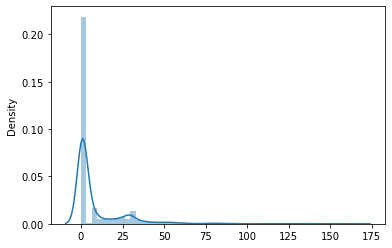

In [221]:
sns.distplot((x),kde=True)

<AxesSubplot:ylabel='Count'>

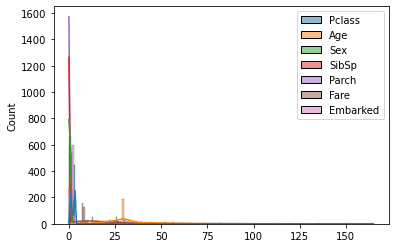

In [317]:
sns.histplot((x),kde=True)

# NEW DISTRIBUTION 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

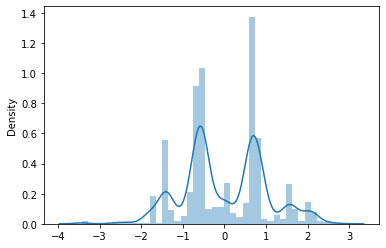

In [222]:
sns.distplot((xnew),kde=True)

<AxesSubplot:ylabel='Count'>

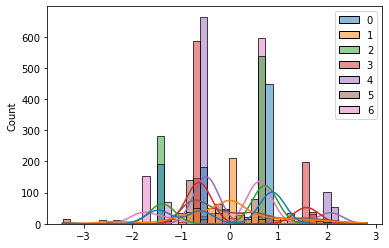

In [318]:
sns.histplot((xnew),kde=True)

## BALANCING THE DATA SET

In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
smt=SMOTE()

In [96]:
x1,y1=smt.fit_resample(xnew,y)

In [97]:
x1.shape

(1000, 7)

In [98]:
y1.shape

(1000,)

In [99]:
y1.value_counts()

0    500
1    500
Name: Survived, dtype: int64

## SCALING THE DATA SET

### WHILE REMOVING SKEWNESS WE HAD USED POWER_TRANSFORM METHOD, THIS HAS SCALED THE DATA SET (X), HENCE NO NEED FOR SCALING THE MODEL AGAIN 

## LOGISTIC REGRESSION

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
lr=LogisticRegression()

In [102]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    predr=lr.predict(x_train)
    pred=lr.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predr))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,pred))
    print('\n')

At random_state {0} the training accuracy test is 0.7925
At random_state {0} the testing accuracy test is 0.795


At random_state {1} the training accuracy test is 0.80625
At random_state {1} the testing accuracy test is 0.7


At random_state {2} the training accuracy test is 0.79125
At random_state {2} the testing accuracy test is 0.785


At random_state {3} the training accuracy test is 0.7975
At random_state {3} the testing accuracy test is 0.795


At random_state {4} the training accuracy test is 0.78625
At random_state {4} the testing accuracy test is 0.81


At random_state {5} the training accuracy test is 0.80375
At random_state {5} the testing accuracy test is 0.765


At random_state {6} the training accuracy test is 0.795
At random_state {6} the testing accuracy test is 0.79


At random_state {7} the training accuracy test is 0.7925
At random_state {7} the testing accuracy test is 0.8


At random_state {8} the training accuracy test is 0.8075
At random_state {8} the testing ac

### AT RANDOM STATE 22 (86%) THE MODEL IS GIVING THE HIGHEST TESTING ACCURACY HENCE WE ARE GOING AHEAD WITH THAT 

In [224]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=22)

In [225]:
lr.fit(x_train,y_train)

LogisticRegression()

In [226]:
PRELR=lr.predict(x_test)

In [227]:
print(accuracy_score(y_test,PRELR))

0.86


In [228]:
print(classification_report(y_test,PRELR))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       100
           1       0.87      0.85      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [229]:
print(confusion_matrix(y_test,PRELR))

[[87 13]
 [15 85]]


## AUC-ROC CURVE

In [109]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [110]:
y_pred_prob1=lr.predict_proba(x_test)[:,1]

In [111]:
y_pred_prob1

array([0.60488988, 0.94286204, 0.11981117, 0.35035059, 0.94739674,
       0.28937989, 0.1775962 , 0.69546978, 0.945694  , 0.72966786,
       0.11907211, 0.32115497, 0.47395925, 0.16462562, 0.83676872,
       0.95350353, 0.90865594, 0.10113287, 0.14300852, 0.12854639,
       0.67879952, 0.79964564, 0.43767234, 0.08363368, 0.30746909,
       0.57358895, 0.97660373, 0.83676872, 0.94500699, 0.70720485,
       0.53043546, 0.94591894, 0.59579156, 0.39271635, 0.1230734 ,
       0.1651633 , 0.14457014, 0.81685694, 0.89944533, 0.29331063,
       0.46173815, 0.58823895, 0.87587678, 0.18992178, 0.72999803,
       0.6978289 , 0.50279503, 0.11336064, 0.12031727, 0.58419613,
       0.72996009, 0.09022696, 0.19327009, 0.21764921, 0.21497767,
       0.22922272, 0.11787118, 0.70746562, 0.09874476, 0.73069364,
       0.11723296, 0.72891681, 0.95399919, 0.8544132 , 0.27777783,
       0.60448349, 0.88676725, 0.69359833, 0.72855259, 0.10300586,
       0.1230734 , 0.74591235, 0.92085997, 0.12583785, 0.85373

In [112]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob1)

In [113]:
tpr

array([0.  , 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04,
       0.04, 0.04, 0.05, 0.05, 0.06, 0.06, 0.07, 0.07, 0.08, 0.08, 0.11,
       0.11, 0.12, 0.12, 0.13, 0.13, 0.14, 0.14, 0.18, 0.18, 0.25, 0.25,
       0.29, 0.29, 0.33, 0.33, 0.36, 0.36, 0.37, 0.37, 0.41, 0.43, 0.47,
       0.47, 0.48, 0.5 , 0.62, 0.62, 0.66, 0.68, 0.69, 0.69, 0.73, 0.78,
       0.82, 0.82, 0.87, 0.87, 0.89, 0.89, 1.  ])

In [114]:
fpr

array([0.  , 0.  , 0.39, 0.4 , 0.43, 0.43, 0.44, 0.46, 0.56, 0.56, 0.59,
       0.61, 0.62, 0.62, 0.68, 0.68, 0.7 , 0.7 , 0.71, 0.71, 0.73, 0.73,
       0.78, 0.78, 0.79, 0.79, 0.83, 0.83, 0.84, 0.84, 0.85, 0.85, 0.86,
       0.86, 0.87, 0.87, 0.88, 0.88, 0.89, 0.89, 0.9 , 0.9 , 0.9 , 0.9 ,
       0.92, 0.92, 0.92, 0.92, 0.94, 0.94, 0.94, 0.94, 0.95, 0.95, 0.95,
       0.95, 0.97, 0.97, 0.99, 0.99, 1.  , 1.  ])

In [115]:
thresholds

array([1.98232292, 0.98232292, 0.88363587, 0.87587678, 0.8544132 ,
       0.85373985, 0.85111134, 0.83676872, 0.74591235, 0.73925041,
       0.72996009, 0.72966786, 0.72891681, 0.72855259, 0.69546978,
       0.69359833, 0.67879952, 0.6502773 , 0.60769523, 0.60488988,
       0.59579156, 0.57358895, 0.53082071, 0.53043546, 0.51621459,
       0.50309907, 0.46173815, 0.45881329, 0.45625955, 0.4078851 ,
       0.39271635, 0.32358715, 0.32115497, 0.28937989, 0.28082518,
       0.24813532, 0.24163348, 0.21764921, 0.21713627, 0.21497767,
       0.20632617, 0.19825498, 0.19327009, 0.17989147, 0.17886628,
       0.17813107, 0.1775962 , 0.14748379, 0.14357542, 0.13658496,
       0.12854639, 0.12852569, 0.12748763, 0.12462046, 0.1230734 ,
       0.12232327, 0.12031727, 0.11747171, 0.11458637, 0.10300586,
       0.10193281, 0.02597995])

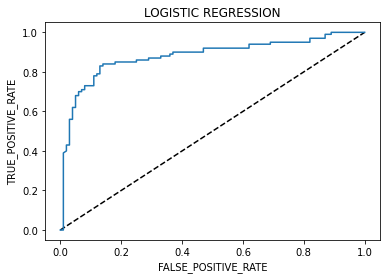

In [116]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='LR')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('LOGISTIC REGRESSION')
plt.show()

In [117]:
auc_score=roc_auc_score(y_test,(lr.predict(x_test)))
auc_score

0.8350000000000001

## SVC

In [118]:
from sklearn.svm import SVC

In [119]:
svc=SVC()

In [120]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=i)
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_train)
    predsvc1=svc.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predsvc))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,predsvc1))
    print('\n')

At random_state {0} the training accuracy test is 0.82875
At random_state {0} the testing accuracy test is 0.795


At random_state {1} the training accuracy test is 0.84
At random_state {1} the testing accuracy test is 0.71


At random_state {2} the training accuracy test is 0.8225
At random_state {2} the testing accuracy test is 0.79


At random_state {3} the training accuracy test is 0.83125
At random_state {3} the testing accuracy test is 0.79


At random_state {4} the training accuracy test is 0.82125
At random_state {4} the testing accuracy test is 0.805


At random_state {5} the training accuracy test is 0.82375
At random_state {5} the testing accuracy test is 0.775


At random_state {6} the training accuracy test is 0.82
At random_state {6} the testing accuracy test is 0.795


At random_state {7} the training accuracy test is 0.825
At random_state {7} the testing accuracy test is 0.805


At random_state {8} the training accuracy test is 0.83375
At random_state {8} the testing ac

### AT RANDOM STATE  53 (84%) ACCURACY WE ARE GETTING, HENCE WE WILL GO AHEAD WITH THAT 

In [235]:
svc=SVC(probability=True)

In [236]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=53)

In [237]:
svc.fit(x_train,y_train)

SVC(probability=True)

In [238]:
PRESVC=svc.predict(x_test)

In [239]:
print(accuracy_score(y_test,PRESVC))

0.84


In [240]:
print(confusion_matrix(y_test,PRESVC))

[[88 15]
 [17 80]]


In [241]:
print(classification_report(y_test,PRESVC))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       103
           1       0.84      0.82      0.83        97

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



### AUC ROC CURVE

In [128]:
y_pred_prob2=svc.predict_proba(x_test)[:,1]

In [129]:
y_pred_prob2

array([0.49144146, 0.16895032, 0.17303829, 0.18019499, 0.87290348,
       0.89568069, 0.94800144, 0.17950167, 0.38262047, 0.1809726 ,
       0.18046788, 0.17689668, 0.87142124, 0.18110621, 0.17942393,
       0.60787644, 0.39953968, 0.1810729 , 0.86144847, 0.15891566,
       0.17270508, 0.18099518, 0.85532845, 0.20501289, 0.8445647 ,
       0.88635966, 0.18739129, 0.18160778, 0.17973069, 0.92137503,
       0.93999187, 0.19017545, 0.31957874, 0.1809726 , 0.39851294,
       0.91892334, 0.8554908 , 0.18090359, 0.1809726 , 0.88247886,
       0.93193005, 0.16892763, 0.06422317, 0.18141898, 0.81712589,
       0.1763428 , 0.14789639, 0.91737615, 0.91297664, 0.16905281,
       0.67111989, 0.72109468, 0.88166679, 0.76371859, 0.85226613,
       0.82502315, 0.83245971, 0.81755849, 0.16892763, 0.88095782,
       0.8529349 , 0.86027703, 0.18113973, 0.85316721, 0.93079246,
       0.91335869, 0.87485591, 0.18940992, 0.90812102, 0.88865347,
       0.1606137 , 0.17492356, 0.17866926, 0.16498193, 0.40464

In [130]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob2)

In [131]:
tpr

array([0.        , 0.        , 0.        , 0.00980392, 0.00980392,
       0.01960784, 0.01960784, 0.02941176, 0.02941176, 0.03921569,
       0.03921569, 0.05882353, 0.05882353, 0.05882353, 0.06862745,
       0.06862745, 0.08823529, 0.08823529, 0.09803922, 0.09803922,
       0.10784314, 0.10784314, 0.11764706, 0.11764706, 0.12745098,
       0.12745098, 0.16666667, 0.16666667, 0.17647059, 0.17647059,
       0.19607843, 0.19607843, 0.21568627, 0.21568627, 0.26470588,
       0.26470588, 0.33333333, 0.34313725, 0.38235294, 0.41176471,
       0.43137255, 0.43137255, 0.45098039, 0.47058824, 0.48039216,
       0.52941176, 0.53921569, 0.53921569, 0.57843137, 0.57843137,
       0.58823529, 0.58823529, 0.59803922, 0.61764706, 0.64705882,
       0.66666667, 0.81372549, 0.81372549, 0.83333333, 0.83333333,
       0.85294118, 0.85294118, 0.87254902, 0.90196078, 0.94117647,
       0.94117647, 0.97058824, 0.97058824, 1.        ])

In [132]:
fpr

array([0.        , 0.01020408, 0.25510204, 0.25510204, 0.26530612,
       0.26530612, 0.28571429, 0.28571429, 0.47959184, 0.47959184,
       0.51020408, 0.51020408, 0.54081633, 0.56122449, 0.56122449,
       0.63265306, 0.63265306, 0.71428571, 0.71428571, 0.7244898 ,
       0.7244898 , 0.73469388, 0.73469388, 0.75510204, 0.75510204,
       0.76530612, 0.76530612, 0.79591837, 0.79591837, 0.80612245,
       0.80612245, 0.82653061, 0.82653061, 0.85714286, 0.85714286,
       0.86734694, 0.86734694, 0.87755102, 0.87755102, 0.87755102,
       0.87755102, 0.89795918, 0.89795918, 0.89795918, 0.89795918,
       0.89795918, 0.89795918, 0.90816327, 0.90816327, 0.91836735,
       0.91836735, 0.92857143, 0.92857143, 0.92857143, 0.92857143,
       0.92857143, 0.92857143, 0.94897959, 0.94897959, 0.96938776,
       0.96938776, 0.97959184, 0.97959184, 0.97959184, 0.97959184,
       0.98979592, 0.98979592, 1.        , 1.        ])

In [133]:
thresholds

array([1.94800144, 0.94800144, 0.89622986, 0.89568069, 0.89496337,
       0.89259741, 0.8917802 , 0.89009524, 0.85532845, 0.85504969,
       0.85316721, 0.85226613, 0.84819529, 0.84741248, 0.84681567,
       0.84202708, 0.82502315, 0.68356411, 0.68286207, 0.67111989,
       0.60787644, 0.55398842, 0.55325749, 0.5       , 0.49144146,
       0.47741726, 0.39957225, 0.39531802, 0.38262047, 0.37740847,
       0.26862598, 0.24157946, 0.21827024, 0.20501289, 0.18776428,
       0.18739129, 0.1815024 , 0.18150006, 0.18128421, 0.18121492,
       0.18113973, 0.1810729 , 0.18101728, 0.18099518, 0.18097797,
       0.1809726 , 0.18090359, 0.18064877, 0.18029693, 0.1802689 ,
       0.18019499, 0.18014899, 0.17988679, 0.17973069, 0.17950167,
       0.17945687, 0.17675354, 0.1763428 , 0.17457803, 0.17303829,
       0.17125061, 0.16905281, 0.16894124, 0.16892763, 0.1606137 ,
       0.15891566, 0.14789639, 0.13975798, 0.06422317])

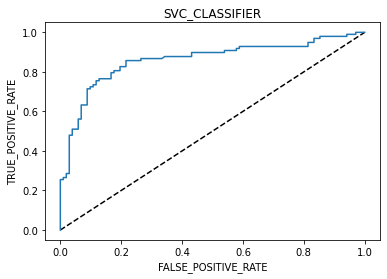

In [134]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='SVC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('SVC_CLASSIFIER')
plt.show()

## KNN CLASSIFIER

In [135]:
knn=KNeighborsClassifier()

In [136]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=i)
    knn.fit(x_train,y_train)
    predknn=knn.predict(x_train)
    predknn1=knn.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predknn))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,predknn1))
    print('\n')

At random_state {0} the training accuracy test is 0.8675
At random_state {0} the testing accuracy test is 0.84


At random_state {1} the training accuracy test is 0.88125
At random_state {1} the testing accuracy test is 0.715


At random_state {2} the training accuracy test is 0.86625
At random_state {2} the testing accuracy test is 0.8


At random_state {3} the training accuracy test is 0.86125
At random_state {3} the testing accuracy test is 0.77


At random_state {4} the training accuracy test is 0.86375
At random_state {4} the testing accuracy test is 0.81


At random_state {5} the training accuracy test is 0.8675
At random_state {5} the testing accuracy test is 0.81


At random_state {6} the training accuracy test is 0.8725
At random_state {6} the testing accuracy test is 0.795


At random_state {7} the training accuracy test is 0.8625
At random_state {7} the testing accuracy test is 0.78


At random_state {8} the training accuracy test is 0.86125
At random_state {8} the testing a

### AT RANDOM STATE 27 (86%) ACCURACY WE ARE GETTING, HENCE WE WILL GO AHEAD WITH THAT 

In [242]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=27)

In [243]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [244]:
PREKNN=knn.predict(x_test)

In [245]:
print(accuracy_score(y_test,PREKNN))

0.86


In [246]:
print(confusion_matrix(y_test,PREKNN))

[[98 13]
 [15 74]]


In [247]:
print(classification_report(y_test,PREKNN))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       111
           1       0.85      0.83      0.84        89

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



## AUC ROC CURVE

In [143]:
y_pred_prob3=knn.predict_proba(x_test)[:,1]

In [144]:
y_pred_prob3

array([1. , 1. , 0.2, 0.2, 1. , 0.8, 0.2, 0.6, 1. , 1. , 0. , 0.2, 0.4,
       0. , 0.8, 1. , 0.8, 0. , 0. , 0. , 1. , 1. , 0.6, 0. , 0.8, 0.2,
       1. , 0.8, 1. , 0.8, 0.6, 1. , 0.6, 0. , 0. , 0.2, 0. , 0.8, 1. ,
       0.4, 0.4, 0.4, 1. , 0.2, 0.8, 0.8, 0.4, 0.6, 0.2, 0.4, 1. , 0.2,
       0.2, 0.4, 0.6, 0.6, 0. , 0.8, 0.2, 1. , 0.4, 0.8, 1. , 1. , 0.2,
       0.8, 0.6, 0.4, 1. , 0. , 0. , 0.8, 1. , 0. , 1. , 0.4, 0.6, 0.6,
       1. , 1. , 0.4, 0.2, 0. , 0.4, 1. , 0. , 0.8, 0.4, 0.2, 0.8, 0.2,
       1. , 0.8, 0.2, 0.4, 0. , 0.4, 0. , 0. , 0.8, 0. , 0.2, 0.8, 1. ,
       1. , 0. , 1. , 0.2, 0. , 0.6, 0. , 1. , 0. , 1. , 1. , 0.2, 0.2,
       0. , 0. , 1. , 0.6, 0.4, 1. , 0.8, 0.2, 1. , 0. , 0.6, 0.6, 0. ,
       0.2, 0.2, 1. , 0.8, 1. , 1. , 1. , 0.8, 0. , 0.2, 1. , 0.6, 0.8,
       0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0.2, 1. , 0.6, 0.6, 0.8, 0.4,
       0. , 0.6, 1. , 1. , 0.2, 0.2, 0.6, 1. , 1. , 0. , 0.8, 0. , 1. ,
       0.8, 0.2, 0.4, 0.2, 0. , 1. , 1. , 0.8, 0.2, 0. , 0.2, 0.

In [145]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob3)

In [146]:
tpr

array([0.  , 0.04, 0.08, 0.18, 0.27, 0.63, 1.  ])

In [147]:
fpr

array([0.  , 0.47, 0.7 , 0.81, 0.91, 0.96, 1.  ])

In [148]:
thresholds

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

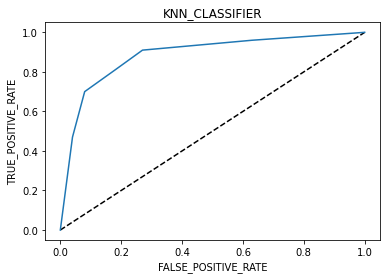

In [149]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='KNN')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('KNN_CLASSIFIER')
plt.show()

In [150]:
auc_score=roc_auc_score(y_test,(knn.predict(x_test)))
auc_score

0.8150000000000001

## DECISION TREE CLASSIFIER

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
dtc=DecisionTreeClassifier()

In [153]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=i)
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_train)
    preddtc1=dtc.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,preddtc))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,preddtc1))
    print('\n')

At random_state {0} the training accuracy test is 0.9875
At random_state {0} the testing accuracy test is 0.8


At random_state {1} the training accuracy test is 0.985
At random_state {1} the testing accuracy test is 0.725


At random_state {2} the training accuracy test is 0.98625
At random_state {2} the testing accuracy test is 0.795


At random_state {3} the training accuracy test is 0.98875
At random_state {3} the testing accuracy test is 0.735


At random_state {4} the training accuracy test is 0.98875
At random_state {4} the testing accuracy test is 0.785


At random_state {5} the training accuracy test is 0.985
At random_state {5} the testing accuracy test is 0.8


At random_state {6} the training accuracy test is 0.99
At random_state {6} the testing accuracy test is 0.805


At random_state {7} the training accuracy test is 0.985
At random_state {7} the testing accuracy test is 0.81


At random_state {8} the training accuracy test is 0.9825
At random_state {8} the testing accura

### AT RANDOM STATE 89 (85.5%) ACCURACY WE ARE GETTING, HENCE WE WILL GO AHEAD WITH THAT 

In [248]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=89)

In [249]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [250]:
PREDTC=dtc.predict(x_test)

In [251]:
print(accuracy_score(y_test,PREDTC))

0.87


In [252]:
print(confusion_matrix(y_test,PREDTC))

[[92 10]
 [16 82]]


In [253]:
print(classification_report(y_test,PREDTC))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       102
           1       0.89      0.84      0.86        98

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



## AUC/ROC CURVE

In [160]:
y_pred_prob4=dtc.predict_proba(x_test)[:,1]

In [161]:
y_pred_prob4

array([0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 0.125     , 1.        , 1.        , 0.90909091,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.5       , 1.        , 0.        ,
       1.        , 0.        , 0.25      , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.5       , 1.        , 1.        , 1.        , 0.5       ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.     

In [162]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob4)

In [163]:
tpr

array([0.  , 0.19, 0.19, 0.19, 0.23, 0.25, 0.28, 1.  ])

In [164]:
fpr

array([0.  , 0.8 , 0.82, 0.83, 0.85, 0.85, 0.86, 1.  ])

In [165]:
thresholds

array([2.        , 1.        , 0.90909091, 0.66666667, 0.5       ,
       0.25      , 0.125     , 0.        ])

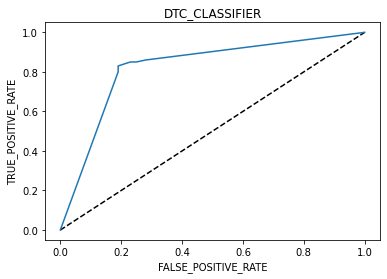

In [166]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='DTC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('DTC_CLASSIFIER')
plt.show()

In [167]:
auc_score=roc_auc_score(y_test,(dtc.predict(x_test)))
auc_score

0.8200000000000001

## RANDOM FOREST CLASSIFIER

In [168]:
rm=RandomForestClassifier()

In [169]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=i)
    rm.fit(x_train,y_train)
    predrm=rm.predict(x_train)
    predrm1=rm.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predrm))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,predrm1))
    print('\n')

At random_state {0} the training accuracy test is 0.9875
At random_state {0} the testing accuracy test is 0.81


At random_state {1} the training accuracy test is 0.985
At random_state {1} the testing accuracy test is 0.775


At random_state {2} the training accuracy test is 0.98625
At random_state {2} the testing accuracy test is 0.82


At random_state {3} the training accuracy test is 0.98875
At random_state {3} the testing accuracy test is 0.835


At random_state {4} the training accuracy test is 0.98875
At random_state {4} the testing accuracy test is 0.825


At random_state {5} the training accuracy test is 0.985
At random_state {5} the testing accuracy test is 0.835


At random_state {6} the training accuracy test is 0.99
At random_state {6} the testing accuracy test is 0.835


At random_state {7} the training accuracy test is 0.985
At random_state {7} the testing accuracy test is 0.83


At random_state {8} the training accuracy test is 0.9825
At random_state {8} the testing accu

### AT RANDOM STATE 35 (88%) ACCURACY WE ARE GETTING, HENCE WE WILL GO AHEAD WITH THAT 

In [255]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=35)

In [256]:
rm.fit(x_train,y_train)

RandomForestClassifier()

In [257]:
PRERM=rm.predict(x_test)

In [258]:
print(accuracy_score(y_test,PRERM))

0.875


In [259]:
print(confusion_matrix(y_test,PRERM))

[[88  9]
 [16 87]]


In [260]:
print(classification_report(y_test,PRERM))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        97
           1       0.91      0.84      0.87       103

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200



## AUC-ROC CURVE

In [176]:
y_pred_prob5=rm.predict_proba(x_test)[:,1]

In [177]:
y_pred_prob5

array([0.24      , 0.99      , 1.        , 0.07      , 0.81      ,
       0.356     , 1.        , 0.08      , 0.145     , 0.02      ,
       0.02      , 0.69      , 0.91      , 0.31      , 0.        ,
       0.        , 0.96      , 0.        , 0.8825    , 0.92      ,
       0.23666667, 1.        , 0.89      , 0.63      , 0.        ,
       0.        , 0.48      , 0.02      , 0.01      , 0.9       ,
       0.        , 0.        , 0.02      , 0.49      , 0.02      ,
       0.28      , 0.9       , 0.14      , 0.99      , 0.24      ,
       0.94      , 0.85      , 1.        , 0.19197727, 1.        ,
       0.21      , 0.02      , 0.12      , 0.07      , 0.        ,
       0.67      , 1.        , 0.86      , 0.89      , 1.        ,
       0.99      , 0.00507937, 0.37266667, 1.        , 0.92      ,
       0.19      , 0.95      , 0.75      , 0.59      , 0.        ,
       0.175     , 0.9       , 0.01      , 0.94      , 0.6       ,
       0.05      , 0.67838095, 0.31      , 0.99      , 0.13   

In [178]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob5)

In [179]:
tpr

array([0.        , 0.00900901, 0.01801802, 0.01801802, 0.01801802,
       0.01801802, 0.01801802, 0.01801802, 0.01801802, 0.03603604,
       0.03603604, 0.03603604, 0.03603604, 0.03603604, 0.03603604,
       0.04504505, 0.04504505, 0.05405405, 0.05405405, 0.05405405,
       0.06306306, 0.06306306, 0.06306306, 0.07207207, 0.07207207,
       0.08108108, 0.08108108, 0.09009009, 0.09009009, 0.10810811,
       0.11711712, 0.13513514, 0.13513514, 0.14414414, 0.14414414,
       0.15315315, 0.15315315, 0.18018018, 0.18018018, 0.20720721,
       0.20720721, 0.22522523, 0.27927928, 0.28828829, 0.30630631,
       0.31531532, 0.31531532, 0.33333333, 0.36036036, 0.37837838,
       0.37837838, 0.38738739, 0.40540541, 0.41441441, 0.44144144,
       0.47747748, 0.47747748, 0.52252252, 0.54054054, 0.54054054,
       0.55855856, 0.58558559, 0.58558559, 0.59459459, 0.61261261,
       0.62162162, 0.64864865, 0.66666667, 0.67567568, 0.7027027 ,
       0.72072072, 0.78378378, 0.8018018 , 0.84684685, 0.85585

In [180]:
fpr

array([0.        , 0.15730337, 0.24719101, 0.28089888, 0.30337079,
       0.35955056, 0.37078652, 0.43820225, 0.4494382 , 0.48314607,
       0.49438202, 0.58426966, 0.60674157, 0.62921348, 0.64044944,
       0.64044944, 0.65168539, 0.65168539, 0.66292135, 0.68539326,
       0.69662921, 0.70786517, 0.73033708, 0.74157303, 0.75280899,
       0.75280899, 0.76404494, 0.76404494, 0.80898876, 0.80898876,
       0.82022472, 0.82022472, 0.83146067, 0.83146067, 0.85393258,
       0.85393258, 0.86516854, 0.86516854, 0.87640449, 0.87640449,
       0.88764045, 0.88764045, 0.88764045, 0.88764045, 0.88764045,
       0.88764045, 0.8988764 , 0.8988764 , 0.8988764 , 0.92134831,
       0.93258427, 0.93258427, 0.93258427, 0.94382022, 0.94382022,
       0.94382022, 0.95505618, 0.95505618, 0.95505618, 0.96629213,
       0.96629213, 0.96629213, 0.97752809, 0.97752809, 0.97752809,
       0.97752809, 0.97752809, 0.97752809, 0.97752809, 0.97752809,
       0.97752809, 0.97752809, 0.97752809, 0.97752809, 0.97752

In [181]:
thresholds

array([2.        , 1.        , 0.99      , 0.98      , 0.97      ,
       0.96      , 0.95      , 0.93      , 0.924     , 0.92      ,
       0.91      , 0.89      , 0.88      , 0.87      , 0.86      ,
       0.85      , 0.83833333, 0.83      , 0.81      , 0.78      ,
       0.77      , 0.75166667, 0.75      , 0.74      , 0.73      ,
       0.69      , 0.68731061, 0.67838095, 0.65      , 0.62      ,
       0.6       , 0.58      , 0.54      , 0.53333333, 0.49      ,
       0.48083333, 0.48      , 0.44333333, 0.44      , 0.42      ,
       0.38      , 0.36      , 0.34      , 0.32      , 0.31      ,
       0.3       , 0.28      , 0.24      , 0.22      , 0.21      ,
       0.20118651, 0.19197727, 0.19      , 0.18      , 0.15      ,
       0.14      , 0.135     , 0.1065    , 0.1       , 0.09      ,
       0.08      , 0.07      , 0.064     , 0.0625    , 0.06      ,
       0.05266667, 0.05      , 0.04      , 0.03333333, 0.03      ,
       0.02166667, 0.02      , 0.0125    , 0.01      , 0.00666

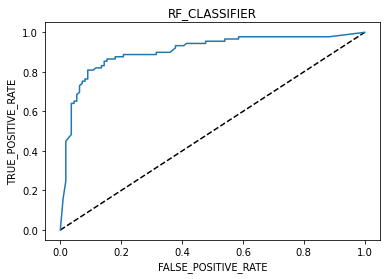

In [182]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='RFC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('RF_CLASSIFIER')
plt.show()

In [183]:
auc_score=roc_auc_score(y_test,(rm.predict(x_test)))
auc_score

0.8492762425346696

## GRADIENT BOOSTING CLASSIFIER

In [261]:
xgb=GradientBoostingClassifier()

In [262]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=i)
    xgb.fit(x_train,y_train)
    predxgb=xgb.predict(x_train)
    predxgb1=xgb.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predxgb))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,predxgb1))
    print('\n')

At random_state {0} the training accuracy test is 0.88875
At random_state {0} the testing accuracy test is 0.835


At random_state {1} the training accuracy test is 0.92125
At random_state {1} the testing accuracy test is 0.79


At random_state {2} the training accuracy test is 0.89875
At random_state {2} the testing accuracy test is 0.825


At random_state {3} the training accuracy test is 0.905
At random_state {3} the testing accuracy test is 0.81


At random_state {4} the training accuracy test is 0.885
At random_state {4} the testing accuracy test is 0.81


At random_state {5} the training accuracy test is 0.89875
At random_state {5} the testing accuracy test is 0.825


At random_state {6} the training accuracy test is 0.9025
At random_state {6} the testing accuracy test is 0.825


At random_state {7} the training accuracy test is 0.90375
At random_state {7} the testing accuracy test is 0.815


At random_state {8} the training accuracy test is 0.905
At random_state {8} the testing 

### AT RANDOM STATE 75(88.5%) ACCURACY WE ARE GETTING, HENCE WE WILL PROCEED WITH THAT 

In [263]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=75)

In [264]:
xgb.fit(x_train,y_train)

GradientBoostingClassifier()

In [265]:
PREXGB=xgb.predict(x_test)

In [266]:
print(accuracy_score(y_test,PREXGB))

0.885


In [267]:
print(confusion_matrix(y_test,PREXGB))

[[90 10]
 [13 87]]


In [268]:
print(classification_report(y_test,PREXGB))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       100
           1       0.90      0.87      0.88       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



## AUC-ROC CURVE

In [192]:
y_pred_prob6=xgb.predict_proba(x_test)[:,1]

In [193]:
y_pred_prob6

array([0.68902566, 0.98769021, 0.26210834, 0.56271368, 0.89609485,
       0.39010862, 0.17824216, 0.79014477, 0.96915997, 0.77757709,
       0.1337161 , 0.29512225, 0.59417891, 0.11174448, 0.91632872,
       0.97138128, 0.95369804, 0.29058878, 0.27685742, 0.03946868,
       0.97828473, 0.93510651, 0.36415057, 0.11599312, 0.32683994,
       0.19539877, 0.98068956, 0.91632872, 0.96915997, 0.89598493,
       0.48938091, 0.96411766, 0.26273715, 0.07543184, 0.15551683,
       0.08337713, 0.27685742, 0.89654642, 0.90233793, 0.08324343,
       0.33033211, 0.6654576 , 0.888551  , 0.2061145 , 0.8935299 ,
       0.71062431, 0.68993819, 0.31900853, 0.56600777, 0.22088327,
       0.87410253, 0.09620512, 0.26635   , 0.18763307, 0.11677919,
       0.20472367, 0.07916818, 0.71062431, 0.16496221, 0.83798071,
       0.28905371, 0.67815088, 0.98685131, 0.91237837, 0.18459204,
       0.97268015, 0.95503644, 0.47800714, 0.85414154, 0.18148776,
       0.15551683, 0.50206542, 0.96600547, 0.12348102, 0.94715

In [194]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob6)

In [195]:
tpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07,
       0.08, 0.08, 0.09, 0.09, 0.1 , 0.1 , 0.12, 0.12, 0.15, 0.15, 0.2 ,
       0.2 , 0.21, 0.21, 0.22, 0.23, 0.24, 0.26, 0.26, 0.28, 0.28, 0.4 ,
       0.4 , 0.46, 0.48, 0.54, 0.59, 0.67, 0.69, 0.75, 0.83, 0.85, 0.85,
       0.9 , 0.9 , 0.95, 0.97, 0.98, 0.98, 1.  ])

In [196]:
fpr

array([0.  , 0.01, 0.05, 0.07, 0.1 , 0.1 , 0.12, 0.14, 0.25, 0.27, 0.34,
       0.36, 0.38, 0.38, 0.44, 0.46, 0.49, 0.49, 0.56, 0.57, 0.58, 0.58,
       0.64, 0.66, 0.69, 0.71, 0.74, 0.74, 0.76, 0.76, 0.79, 0.82, 0.84,
       0.84, 0.85, 0.85, 0.86, 0.86, 0.87, 0.87, 0.88, 0.88, 0.89, 0.89,
       0.9 , 0.9 , 0.91, 0.91, 0.93, 0.93, 0.93, 0.94, 0.94, 0.96, 0.96,
       0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.98,
       0.98, 0.99, 0.99, 0.99, 0.99, 1.  , 1.  ])

In [197]:
thresholds

array([1.99345784, 0.99345784, 0.98685131, 0.98475173, 0.9831893 ,
       0.98286896, 0.9808915 , 0.98068956, 0.9692068 , 0.96915997,
       0.95730807, 0.95503644, 0.94877459, 0.9471542 , 0.92229397,
       0.91632872, 0.90233793, 0.90228913, 0.89189779, 0.888551  ,
       0.87410253, 0.85414154, 0.79014477, 0.77757709, 0.71120116,
       0.71062431, 0.68993819, 0.68902566, 0.66838773, 0.6654576 ,
       0.62614656, 0.59417891, 0.56600777, 0.56271368, 0.55803084,
       0.54012263, 0.53273854, 0.52056381, 0.50206542, 0.47800714,
       0.3980355 , 0.36415057, 0.33033211, 0.31900853, 0.29512225,
       0.29058878, 0.28905371, 0.283874  , 0.27685742, 0.27537843,
       0.26635   , 0.26273715, 0.26125989, 0.2508623 , 0.19321505,
       0.19112276, 0.17878931, 0.17824216, 0.15855753, 0.15551683,
       0.13308806, 0.13151511, 0.10914276, 0.09954053, 0.09620512,
       0.09497092, 0.07916818, 0.07543184, 0.04735959, 0.03946868,
       0.03090155, 0.0272275 , 0.02237971])

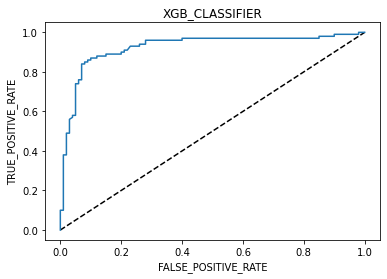

In [198]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='XGB')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('XGB_CLASSIFIER')
plt.show()

In [199]:
auc_score=roc_auc_score(y_test,(xgb.predict(x_test)))
auc_score

0.885

## CROSS VAL SCORE

In [269]:
for m in [lr,svc,knn,dtc,rm,xgb]:
    cv=cross_val_score(m,x1,y1,cv=8)
    print('CV','is',(cv.mean()))

CV is 0.788
CV is 0.802
CV is 0.8150000000000001
CV is 0.79
CV is 0.8190000000000001
CV is 0.8210000000000001


### ACCURACY SCORES OF MODEL 

### LR-86
### SVR-84
### KNN-86
### DTC-87
### RM-87.5
### XGB-88.5

In [270]:
(86-78.8)

7.200000000000003

In [271]:
(84-80.20)

3.799999999999997

In [272]:
(86.-81.50)

4.5

In [273]:
(87-79)

8

In [274]:
(87.5-81.9)

5.599999999999994

In [275]:
(88.5-82.10)

6.400000000000006

### THERE IS A VERY SLIGHT CASE OF OVERFITTING IN ALL THE MODELS 

### WE WILL DO HYPER TUNING ON SVC AS THE DIFFERENCE BETWEEN CV SCORE AND ACCURACY IS THE LEAST 


## SVC CLASSIFIER- HYPER TUNING

In [207]:
SVC1=SVC()

In [291]:
dct={'kernel':['poly','rbf','linear','sigmoid'],'gamma':['scale','auto'],'random_state':list(range(10)),'decision_function_shape':['ovo','ovr'],'degree':[1,2,3,4]}

In [292]:
gd=GridSearchCV(SVC1,dct,cv=8,scoring='accuracy')

In [293]:
gd.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'linear', 'sigmoid'],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [294]:
gd.best_params_

{'decision_function_shape': 'ovo',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'random_state': 0}

In [300]:
SVC2=SVC(kernel='rbf',random_state=0,gamma='scale',degree=1,decision_function_shape='ovo',probability=True)

In [301]:
SVC2.fit(x_train,y_train)

SVC(decision_function_shape='ovo', degree=1, probability=True, random_state=0)

In [314]:
PRESVC2=SVC2.predict(x_test)

In [316]:
print(accuracy_score(y_test,PRESVC2))

0.81


## THE ACCURACY SCORE HAS SLIGHLY IMPORVED WRT TO THE CV MEAN SCORE, HENCE WE WILL SELECT & SAVE THIS MODEL 

## AUC-ROC CURVE -SVC MODEL 

In [304]:
y_pred_prob7=SVC2.predict_proba(x_test)[:,1]

In [306]:
y_pred_prob7

array([0.85307997, 0.87232853, 0.19842855, 0.29939636, 0.93346864,
       0.21330539, 0.1847686 , 0.28372373, 0.87019438, 0.85511745,
       0.19837012, 0.29021835, 0.27078599, 0.19736585, 0.88474201,
       0.93863336, 0.87530812, 0.183182  , 0.19792216, 0.16615685,
       0.9089937 , 0.87439955, 0.43776432, 0.20795147, 0.21202506,
       0.24129339, 0.86045339, 0.88474201, 0.87148035, 0.85543052,
       0.26738678, 0.86794583, 0.29230929, 0.37065375, 0.19830674,
       0.18273928, 0.19783675, 0.89597822, 0.92973962, 0.1632531 ,
       0.2900339 , 0.27445475, 0.88794504, 0.24288025, 0.83618803,
       0.84179218, 0.27416067, 0.19856216, 0.19837089, 0.2468351 ,
       0.85521385, 0.19167153, 0.19845078, 0.18788641, 0.75037208,
       0.78276829, 0.19839503, 0.84032409, 0.1856813 , 0.85545177,
       0.1984805 , 0.84984129, 0.89702849, 0.89485303, 0.19806858,
       0.80638595, 0.85075044, 0.84866949, 0.85474113, 0.1985476 ,
       0.19830674, 0.83866977, 0.89423496, 0.08410718, 0.85322

In [307]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob7)

In [308]:
tpr

array([0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.04, 0.04,
       0.05, 0.05, 0.06, 0.06, 0.07, 0.07, 0.1 , 0.1 , 0.12, 0.12, 0.13,
       0.13, 0.14, 0.14, 0.15, 0.15, 0.16, 0.16, 0.32, 0.32, 0.33, 0.35,
       0.37, 0.37, 0.38, 0.38, 0.42, 0.47, 0.55, 0.55, 0.83, 0.83, 0.84,
       0.84, 0.87, 0.87, 0.89, 0.93, 0.95, 1.  ])

In [309]:
fpr

array([0.  , 0.01, 0.24, 0.25, 0.27, 0.51, 0.53, 0.53, 0.54, 0.54, 0.58,
       0.58, 0.6 , 0.6 , 0.63, 0.63, 0.7 , 0.7 , 0.74, 0.74, 0.78, 0.78,
       0.82, 0.82, 0.84, 0.84, 0.89, 0.89, 0.91, 0.91, 0.93, 0.93, 0.93,
       0.93, 0.94, 0.94, 0.95, 0.95, 0.95, 0.95, 0.97, 0.97, 0.98, 0.98,
       0.99, 0.99, 1.  , 1.  , 1.  , 1.  , 1.  ])

In [310]:
thresholds

array([1.93939149, 0.93939149, 0.89079378, 0.88794504, 0.88474201,
       0.85521385, 0.85511745, 0.85474113, 0.85460901, 0.85307997,
       0.84972791, 0.84866949, 0.84532345, 0.84439298, 0.84179218,
       0.84127472, 0.79596412, 0.75037208, 0.48206579, 0.39562339,
       0.3032509 , 0.29939636, 0.28372373, 0.28256609, 0.27504011,
       0.27445475, 0.26778494, 0.26738678, 0.26117189, 0.1985476 ,
       0.1984805 , 0.19845421, 0.19845078, 0.19839503, 0.19837089,
       0.19837012, 0.19834323, 0.19831173, 0.19830674, 0.19792216,
       0.19783675, 0.19030837, 0.18797856, 0.18788641, 0.18601032,
       0.18528695, 0.18508588, 0.1847686 , 0.18273928, 0.16615685,
       0.08410718])

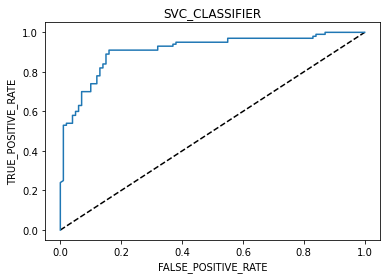

In [311]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='SVC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('SVC_CLASSIFIER')
plt.show()

In [312]:
auc_score=roc_auc_score(y_test,(SVC2.predict(x_test)))
auc_score

0.81

## SAVING THE MODEL 

In [319]:
import pickle

In [320]:
filename='churn.pkl'
pickle.dump(SVC2,open(filename,'wb'))

In [321]:
loaded_model=pickle.load(open('churn.pkl','rb'))

In [323]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['PREDICTED','ORIGINAL'])

In [324]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
PREDICTED,1,1,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,1
ORIGINAL,0,1,0,0,1,0,0,1,1,1,...,0,1,0,0,0,0,0,1,0,0
